In [1]:
# Divyesh AIML

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [3]:
! kaggle datasets download -d sshikamaru/fruit-recognition

 83% 85.0M/102M [00:00<00:00, 117MB/s]
100% 102M/102M [00:00<00:00, 128MB/s] 


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-recognition.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os
import cv2
import pathlib
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model

In [7]:
train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train/train',
    labels= 'inferred',
    label_mode= 'int',
    batch_size= 32,
    image_size=(256,256)
)

Found 16854 files belonging to 33 classes.


In [8]:
for dirpath, dirnames, filenames in os.walk("/content/train/train"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 33 directories and 0 images in '/content/train/train'.
There are 0 directories and 492 images in '/content/train/train/Apricot'.
There are 0 directories and 492 images in '/content/train/train/Pomegranate'.
There are 0 directories and 492 images in '/content/train/train/Cherry'.
There are 0 directories and 490 images in '/content/train/train/Mango'.
There are 0 directories and 492 images in '/content/train/train/Peach'.
There are 0 directories and 492 images in '/content/train/train/Papaya'.
There are 0 directories and 466 images in '/content/train/train/Kiwi'.
There are 0 directories and 475 images in '/content/train/train/Watermelon'.
There are 0 directories and 490 images in '/content/train/train/Banana'.
There are 0 directories and 392 images in '/content/train/train/Cucumber Ripe'.
There are 0 directories and 492 images in '/content/train/train/Apple Granny Smith'.
There are 0 directories and 479 images in '/content/train/train/Orange'.
There are 0 directories and 438 im

In [9]:
train_path = "/content/train/train"

In [10]:
data_dir = pathlib.Path(train_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Apple Braeburn' 'Apple Granny Smith' 'Apricot' 'Avocado' 'Banana'
 'Blueberry' 'Cactus fruit' 'Cantaloupe' 'Cherry' 'Clementine' 'Corn'
 'Cucumber Ripe' 'Grape Blue' 'Kiwi' 'Lemon' 'Limes' 'Mango' 'Onion White'
 'Orange' 'Papaya' 'Passion Fruit' 'Peach' 'Pear' 'Pepper Green'
 'Pepper Red' 'Pineapple' 'Plum' 'Pomegranate' 'Potato Red' 'Raspberry'
 'Strawberry' 'Tomato' 'Watermelon']


In [11]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label
train_data = train_data.map(process)

In [12]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape = (256,256,3))),
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu')),
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu')),
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(33,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

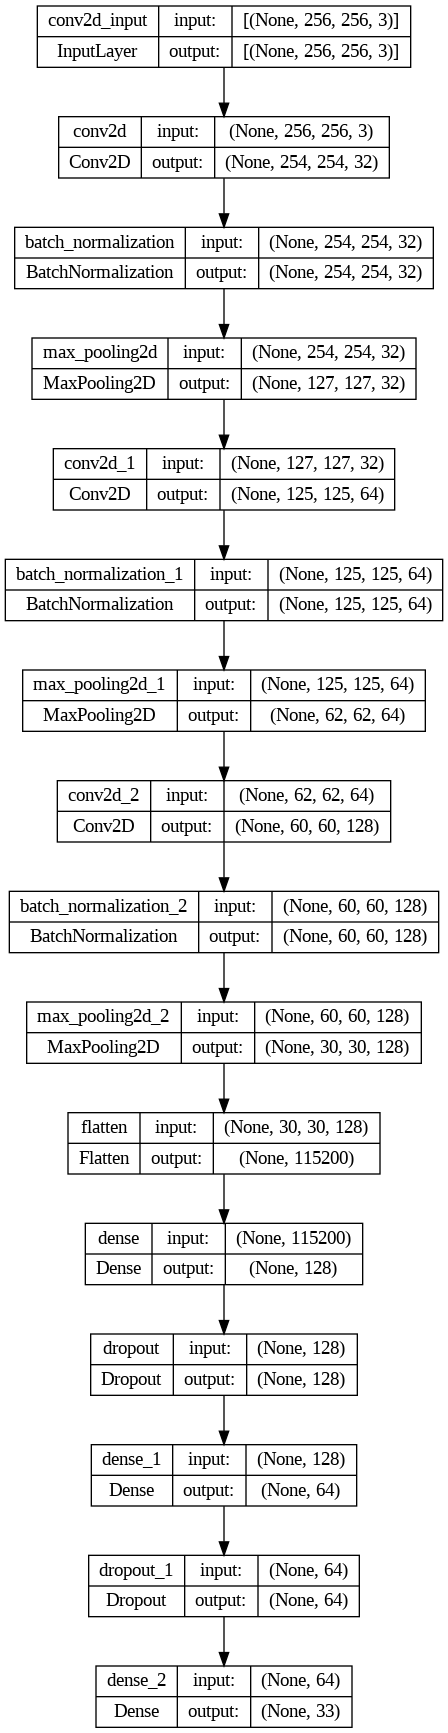

In [14]:
plot_model(model,show_shapes=True,show_layer_names=True)

In [15]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [16]:
history = model.fit(train_data,epochs=10)

Epoch 1/10
527/527 [==============================] - 63s 91ms/step - loss: 1.0780 - accuracy: 0.8867
Epoch 2/10
527/527 [==============================] - 48s 91ms/step - loss: 0.5026 - accuracy: 0.9616
Epoch 3/10
527/527 [==============================] - 47s 89ms/step - loss: 0.2080 - accuracy: 0.9823
Epoch 4/10
527/527 [==============================] - 48s 89ms/step - loss: 0.1482 - accuracy: 0.9895
Epoch 5/10
527/527 [==============================] - 47s 90ms/step - loss: 0.3184 - accuracy: 0.9837
Epoch 6/10
527/527 [==============================] - 48s 90ms/step - loss: 0.0616 - accuracy: 0.9950
Epoch 7/10
527/527 [==============================] - 47s 89ms/step - loss: 0.2502 - accuracy: 0.9881
Epoch 8/10
527/527 [==============================] - 47s 89ms/step - loss: 0.2841 - accuracy: 0.9871
Epoch 9/10
527/527 [==============================] - 47s 89ms/step - loss: 0.1744 - accuracy: 0.9918
Epoch 10/10
527/527 [==============================] - 47s 90ms/step - loss: 0.129